# **LINEAR REGRESSION WITH PYTHON LIBRARIES**

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

# Load data
df = pd.read_csv('/content/salary_data_cleaned.csv')
df.head()

# Select relevant columns
df_model = df[['Rating','Location','Size','Type of ownership','Industry','Sector','Revenue','hourly','employer_provided','avg_salary',
               'same_state','age','python_yn','spark','aws','excel','Job Title','math', 'engineering', 'data analysis', 'AI']]
df_dum = pd.get_dummies(df_model, drop_first=True)

# Convert boolean columns to integers
bool_columns = df_dum.select_dtypes(include=['bool']).columns
df_dum[bool_columns] = df_dum[bool_columns].astype(int)

# Train test split
X = df_dum.drop('avg_salary', axis=1)
y = df_dum.avg_salary.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)



Performance Metrics

In [13]:
# Calculate metrics
mse = mean_squared_error(y_test, y_pred_lr)
mae = mean_absolute_error(y_test, y_pred_lr)
rmse = mean_squared_error(y_test, y_pred_lr, squared=False)
r2 = r2_score(y_test, y_pred_lr)

def adjusted_r2_score(y_true, y_pred, X):
    r2 = r2_score(y_true, y_pred)
    n = X.shape[0]
    p = X.shape[1]
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

adjusted_r2 = adjusted_r2_score(y_test, y_pred_lr, X_test)

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred_lr)
explained_variance = explained_variance_score(y_test, y_pred_lr)

print("Mean Squared Error :", mse)
print("Mean Absolute Error :", mae)
print("Root Mean Squared Error :", rmse)
print("R-squared (R²) Score:", r2)
print("Adjusted R-squared (Adjusted R²) Score:", adjusted_r2)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Explained Variance Score:", explained_variance)

Mean Squared Error : 3748.954246996
Mean Absolute Error : 29.425706501547925
Root Mean Squared Error : 61.22870443669375
R-squared (R²) Score: -1.2936240893404314
Adjusted R-squared (Adjusted R²) Score: 1.7697423247673103
Mean Absolute Percentage Error (MAPE): 32.0463296345524
Explained Variance Score: -1.1871198192591756


In [14]:
#Evaluating overfitting and underfitting of model
df_model = df[['Rating','Location','Size','Type of ownership','Industry','Sector','Revenue','hourly','employer_provided','avg_salary',
               'same_state','age','python_yn','spark','aws','excel','Job Title','math', 'engineering', 'data analysis', 'AI']]

df_dum = pd.get_dummies(df_model)
X = df_dum.drop('avg_salary', axis=1)
y = df_dum['avg_salary'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_test = lr.predict(X_test)
y_pred_train = lr.predict(X_train)

# Mean Squared Error for Train and Test
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
mse_test = mse_test/10000000000000000000

print(f"Linear Regression - Train MSE: {mse_train}, Test MSE: {mse_test}")

Linear Regression - Train MSE: 8.786400593521043, Test MSE: 296.5028997227036


In [15]:
from sklearn.metrics import mean_squared_error

train_errors = []
test_errors = []
values = range(1, 21)  # Example range for tree depths

for i in values:
    # Configure the model
    model = LinearRegression()
    # Fit model on the training dataset
    model.fit(X_train, y_train)
    # Evaluate on the train dataset
    train_yhat = model.predict(X_train)
    train_mse = mean_squared_error(y_train, train_yhat)
    train_errors.append(train_mse)
    # Evaluate on the test dataset
    test_yhat = model.predict(X_test)
    test_mse = mean_squared_error(y_test, test_yhat)
    test_mse = test_mse/10000000000000000000
    test_errors.append(test_mse)
    # Summarize progress
    print(f'>{i}, train MSE: {train_mse:.3f}, test MSE: {test_mse:.3f}')


>1, train MSE: 8.786, test MSE: 296.503
>2, train MSE: 8.786, test MSE: 296.503
>3, train MSE: 8.786, test MSE: 296.503
>4, train MSE: 8.786, test MSE: 296.503
>5, train MSE: 8.786, test MSE: 296.503
>6, train MSE: 8.786, test MSE: 296.503
>7, train MSE: 8.786, test MSE: 296.503
>8, train MSE: 8.786, test MSE: 296.503
>9, train MSE: 8.786, test MSE: 296.503
>10, train MSE: 8.786, test MSE: 296.503
>11, train MSE: 8.786, test MSE: 296.503
>12, train MSE: 8.786, test MSE: 296.503
>13, train MSE: 8.786, test MSE: 296.503
>14, train MSE: 8.786, test MSE: 296.503
>15, train MSE: 8.786, test MSE: 296.503
>16, train MSE: 8.786, test MSE: 296.503
>17, train MSE: 8.786, test MSE: 296.503
>18, train MSE: 8.786, test MSE: 296.503
>19, train MSE: 8.786, test MSE: 296.503
>20, train MSE: 8.786, test MSE: 296.503


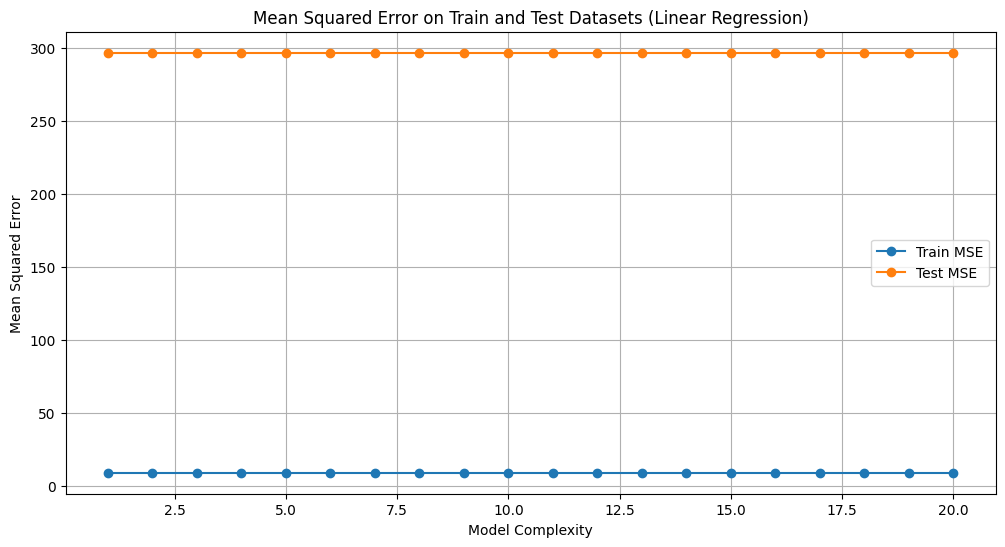

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(values, train_errors, marker='o', label='Train MSE')
plt.plot(values, test_errors, marker='o', label='Test MSE')
plt.xlabel('Model Complexity')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error on Train and Test Datasets (Linear Regression)')
plt.legend()
plt.grid(True)
plt.show()

# **LINEAR REGRESSION WITHOUT PYTHON LIBRARIES**

In [17]:
import pandas as pd
import numpy as np

# Load data
df = pd.read_csv('/content/salary_data_cleaned.csv')

# Select relevant columns
df_model = df[['Rating','Location','Size','Type of ownership','Industry','Sector','Revenue','hourly','employer_provided','avg_salary',
               'same_state','age','python_yn','spark','aws','excel','Job Title','math', 'engineering', 'data analysis', 'AI']]
df_dum = pd.get_dummies(df_model, drop_first=True)

# Convert boolean columns to integers
bool_columns = df_dum.select_dtypes(include=['bool']).columns
df_dum[bool_columns] = df_dum[bool_columns].astype(int)

# Train test split
from sklearn.model_selection import train_test_split
X = df_dum.drop('avg_salary', axis=1)
y = df_dum.avg_salary.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Manual implementation of linear regression
class ManualLinearRegression:
    def __init__(self):
        self.coefficients = None
        self.intercept = None

    def fit(self, X, y):
        X = np.insert(X.values, 0, 1, axis=1)  # Add intercept term
        X_transpose = np.transpose(X)
        X_transpose_X = np.dot(X_transpose, X)
        X_transpose_y = np.dot(X_transpose, y)
        solution = np.linalg.lstsq(X_transpose_X, X_transpose_y, rcond=None)[0]
        self.intercept = solution[0]
        self.coefficients = solution[1:]

    def predict(self, X):
        return np.dot(X.values, self.coefficients) + self.intercept

# Fit the model
manual_lr = ManualLinearRegression()
manual_lr.fit(X_train, y_train)
y_pred_lr = manual_lr.predict(X_test)



Performance Metrics

In [18]:
# Mean Squared Error (MSE)
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Mean Absolute Error (MAE)
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

# Root Mean Squared Error (RMSE)
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# R-squared (R²) Score
def r2_score(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

# Adjusted R-squared (Adjusted R²) Score
def adjusted_r2_score(y_true, y_pred, X):
    r2 = r2_score(y_true, y_pred)
    n = X.shape[0]
    p = X.shape[1]
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


# Explained Variance Score
def explained_variance_score(y_true, y_pred):
    variance_y_true = np.var(y_true)
    variance_residual = np.var(y_true - y_pred)
    return 1 - (variance_residual / variance_y_true)

# Calculating all metrics
mse = mean_squared_error(y_test, y_pred_lr)
mae = mean_absolute_error(y_test, y_pred_lr)
rmse = root_mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)
adjusted_r2 = adjusted_r2_score(y_test, y_pred_lr, X_test)
mape = mean_absolute_percentage_error(y_test, y_pred_lr)
explained_variance = explained_variance_score(y_test, y_pred_lr)

# Printing the metrics
print("Mean Squared Error :", mse)
print("Mean Absolute Error :", mae)
print("Root Mean Squared Error :", rmse)
print("R-squared (R²) Score:", r2)
print("Adjusted R-squared (Adjusted R²) Score:", adjusted_r2)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Explained Variance Score:", explained_variance)

Mean Squared Error : 3764.7869286483306
Mean Absolute Error : 29.58152150652978
Root Mean Squared Error : 61.35785955073996
R-squared (R²) Score: -1.303310582598049
Adjusted R-squared (Adjusted R²) Score: 1.7729931206905016
Mean Absolute Percentage Error (MAPE): 32.110356705567405
Explained Variance Score: -1.20083366498858
